<a href="https://colab.research.google.com/github/Hassan6678/NLP/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import re
dataset = pd.read_csv('Whatsapp_chat.csv', usecols=[0,1])

In [ ]:
#dataset = dataset[dataset['Mode'].isin(['Positive', 'Negative'])]
dataset["Mode"].value_counts()

Neutral     6338
Positive    3762
Negative    1972
Name: Mode, dtype: int64

In [ ]:
data_pos = dataset[dataset['Mode'] == 'Positive'].iloc[:100]
data_neg = dataset[dataset['Mode'] == 'Negative'].iloc[:100]
data_neu = dataset[dataset['Mode'] == 'Neutral'].iloc[:100]

small_dataset = pd.concat([data_pos,data_neg,data_neu])

small_dataset = small_dataset.reset_index(drop=True)
#small_dataset.iloc[:,0]

In [ ]:
#data_neg

In [ ]:
print(dataset['Mode'].value_counts(normalize=True))
baseline = 0.3

Neutral     0.525017
Positive    0.311630
Negative    0.163353
Name: Mode, dtype: float64


In [ ]:
######### work for small dataset #########

corpus=[]
stopwords=['rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'nai','ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh', 'rha', 'hota', 'ho', 'ga', 'ka', 'le', 'lye', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch', 'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to', 'is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala', 'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'sent', 'photo', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi', 'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil', 'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou']
for i in range(small_dataset.shape[0]):
    message = (re.sub('[^a-zA-Z]',' ',str(small_dataset.iloc[:,0].values[i]))).lower().split()
    message = [word for word in message if not word in stopwords]
    message = ' '.join(message)
    corpus.append(message)

In [ ]:
corpus=[]
stopwords=['rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'nai','ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh', 'rha', 'hota', 'ho', 'ga', 'ka', 'le', 'lye', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch', 'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to', 'is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala', 'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'sent', 'photo', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi', 'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil', 'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou']
for i in range(dataset.shape[0]):
    message = re.sub('[^a-zA-Z]',' ',str(dataset.iloc[:,0].values[i]))
    message = message.lower()
    message = message.split()
    message = [word for word in message if not word in stopwords]
    message = ' '.join(message)
    corpus.append(message)

In [ ]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout, Bidirectional, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(corpus)

print(len(tokenizer.word_index))
X = tokenizer.texts_to_sequences(corpus)
X = pad_sequences(X, padding='post') # padding our text vector so they all have the same length (maximum lenth sub_list in list array)
maxLength = len(X[0])

# maxList = max(X, key = lambda i: len(i))
# maxLength = len(maxList)

31464


In [ ]:
model = Sequential()
model.add(Embedding(5000, 64, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.2)))
model.add(Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.2)))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 187, 64)           320000    
_________________________________________________________________
bidirectional_23 (Bidirectio (None, 187, 128)          66048     
_________________________________________________________________
bidirectional_24 (Bidirectio (None, 128)               98816     
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 387       
Total params: 485,251
Trainable params: 485,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
################ Small dataset #######3#######
y = pd.get_dummies(small_dataset['Mode']).values
[print(small_dataset['Mode'][i], y[i]) for i in range(49,51)]


Positive [0 0 1]
Positive [0 0 1]


[None, None]

In [ ]:
y = pd.get_dummies(dataset['Mode']).values
[print(dataset['Mode'][i], y[i]) for i in range(12000,12001)]

# Positive [0 0 1]
# Neutral [0 1 0]
# Negative [1 0 0]

Negative [1 0 0]


[None]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=37)

In [ ]:
batch_size = 32
epochs = 8

history = model.fit(X_train, y_train, validation_data=(X_test,y_test) ,epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/8
443/443 [==============================] - 545s 1s/step - loss: 0.6624 - accuracy: 0.7331 - val_loss: 0.8616 - val_accuracy: 0.6431
Epoch 2/8
443/443 [==============================] - 514s 1s/step - loss: 0.5692 - accuracy: 0.7774 - val_loss: 0.8896 - val_accuracy: 0.6372
Epoch 3/8
 37/443 [=>............................] - ETA: 7:07 - loss: 0.4461 - accuracy: 0.8361

KeyboardInterrupt: ignored

In [ ]:
model.save('10_sentiment_analysis.h5')

In [ ]:
predictions = model.predict(X_test)

[print(dataset['Message'][i], predictions[i], y_test[i]) for i in range(0, 5)]

Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus [0.01677844 0.37565228 0.6075693 ] [0 1 0]
sahi bt h [0.989433   0.00535057 0.00521645] [1 0 0]
Kya bt hai, [0.04437606 0.5005905  0.45503354] [0 0 1]
Wah je wah [0.05015991 0.49292016 0.45691985] [0 1 0]
Are wha kaya bat hai [0.0012066  0.00757369 0.9912197 ] [0 0 1]


[None, None, None, None, None]

In [ ]:
predictions = new_model.predict(X_test)
predicted_categories = tf.argmax(predictions, axis=1)
predicted_categories[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])>

In [ ]:
true_categories = tf.argmax(y_test, axis=1)
true_categories[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([1, 2, 2, 1, 2, 1, 1, 1, 0, 2])>

[[   1 1567    0]
 [   0 2731    0]
 [   0 1770    0]]


Text(89.18, 0.5, 'Predicted Label')

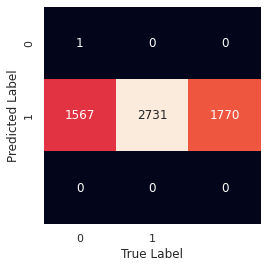

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

#print(y_test)

mat = confusion_matrix(true_categories, predicted_categories)
print(mat)

sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
           xticklabels=np.unique(y_test),yticklabels=np.unique(y_test))
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

In [ ]:
pos_count, neu_count, neg_count = 0, 0, 0
real_pos, real_neu, real_neg = 0, 0, 0
for i, prediction in enumerate(predictions):
    if np.argmax(prediction)==2:
        pos_count += 1
    elif np.argmax(prediction)==1:
        neu_count += 1
    else:
        neg_count += 1
    
    if np.argmax(y_test[i])==2:
        real_pos += 1
    elif np.argmax(y_test[i])==1:    
        real_neu += 1
    else:
        real_neg +=1

print('Positive predictions:', pos_count)
print('Neutral predictions:', neu_count)
print('Negative predictions:', neg_count)
print('Real positive:', real_pos)
print('Real neutral:', real_neu)
print('Real negative:', real_neg)

Positive predictions: 11
Neutral predictions: 7
Negative predictions: 12
Real positive: 11
Real neutral: 6
Real negative: 13


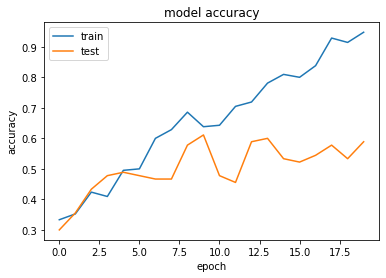

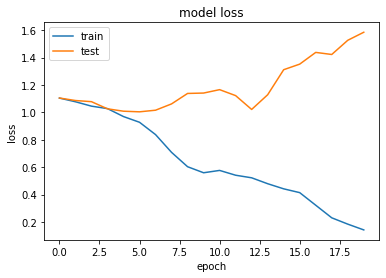

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
result = new_model.evaluate(X_test,y_test)
result
#len(X_test),len(y_test)

190/190 [==============================] - 100s 522ms/step - loss: 1.5502 - accuracy: 0.4502


[1.550185203552246, 0.4501565396785736]

In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('sentiment_analysis.h5')

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 187, 256)          1280000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 187, 256)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 187, 256)          525312    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#/* ~~~~~~~~~~~ Model Predict User Input ~~~~~~~~~~~~ */
new_text = ['Wah je Waah, kya bat han', 'Lanat hy police walo py 😒', 'ye galt bat ha']
seq = tokenizer.texts_to_sequences(new_text)
padded = pad_sequences(seq, maxlen=maxLength)
for case in range(len(seq)):  
  pred = model.predict(padded[[case]])
  labels = ['Negative', 'Neutral', 'Positive']
  print(pred, labels[np.argmax(pred)])

[[0.00177938 0.054926   0.94329464]] Positive
[[9.9988723e-01 4.6301182e-05 6.6506553e-05]] Negative
[[0.36460218 0.59368557 0.04171224]] Neutral


In [ ]:
def startsWithDateAndTime(s):
    pattern = '[0-9]{2}/[0-9]{2}/[0-9]{4}' # for New Group settings
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [ ]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    splitMessage = message.split(': ') 
    author = splitMessage[0] 
    message = ' '.join(splitMessage[1:])
    return date, time, author, message


In [ ]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
### Uploading exported chat file
conversationPath = 'chat_with_Shakir.txt' # chat file
with open(conversationPath, encoding="utf-8") as fp:
    ### Skipping first line of the file because contains information related to something about end-to-end encryption
    fp.readline()
    
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        #print(line)
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line):
            #print('..........')
            if len(messageBuffer) > 0:
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)
    
print(len(parsedData))

SHChat = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
SHChat["Date"] = pd.to_datetime(SHChat["Date"])

339


In [ ]:
#SHChat

In [ ]:
# Data Cleaning process 
### Counting number of letters in each message
SHChat['Words'] = SHChat['Message'].apply(lambda s : len(s.split(' ')))
SHChat = SHChat[SHChat['Message'] != '<Media omitted>']
SHChat = SHChat[SHChat['Words'] != 1]


In [ ]:
Hassan_Chat = SHChat[SHChat['Author'] == 'HR']
Shakir_Chat = SHChat[SHChat['Author'] == 'Shakir MS_27']

In [ ]:
Shakir_Chat

,Date,Time,Author,Message,Words
2,2021-08-17,8:51 pm,Shakir MS_27,Walaikum Assalam,2
3,2021-08-17,8:51 pm,Shakir MS_27,Ma mast tu auna,4
7,2021-08-17,8:56 pm,Shakir MS_27,Wah bi wah parhny waly log😂,6
8,2021-08-17,8:56 pm,Shakir MS_27,Chaa gya larky tu to🙌🙌,5
10,2021-08-17,8:58 pm,Shakir MS_27,Ye rahi chat,3
...,...,...,...,...,...
317,2021-09-16,2:10 pm,Shakir MS_27,Raat ko call kr k pucho ga abhi to zra kahi ja...,13
321,2021-09-23,4:02 pm,Shakir MS_27,Wo hr jga parah hai likhna roman urdu data set...,11
328,2021-08-10,2:25 pm,Shakir MS_27,Good tu suna,3
332,2021-08-10,2:27 pm,Shakir MS_27,Viva ho jaye phir ly lena,6


In [ ]:
Hassan_msg = Hassan_Chat['Message'].to_list()
Shakir_msg = Shakir_Chat['Message'].to_list()
def pred_arr(msg):
  seq = tokenizer.texts_to_sequences(msg)
  padded = pad_sequences(seq, maxlen=maxLength)

  pos_count, neu_count, neg_count = 0, 0, 0
  for case in range(len(seq)):
    #print(Hassan_message[case])
    pred = model.predict(padded[[case]])
    labels = ['Negative', 'Neutral', 'Positive']
    #print(pred, labels[np.argmax(pred)])
    if np.argmax(pred)==2:
        pos_count += 1
    elif np.argmax(pred)==1:
        neu_count += 1
    else:
        neg_count += 1

  print('Positive predictions:', pos_count)
  print('Neutral predictions:', neu_count)
  print('Negative predictions:', neg_count)

  p = [neg_count, neu_count, pos_count]
  return p

data1 = np.array(pred_arr(Hassan_msg))
data2 = np.array(pred_arr(Shakir_msg))

Positive predictions: 27
Neutral predictions: 78
Negative predictions: 35
Positive predictions: 21
Neutral predictions: 57
Negative predictions: 35


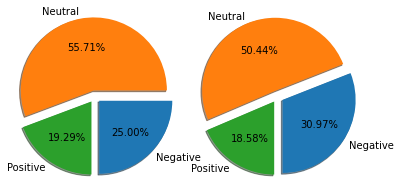

In [ ]:
myexplode = [0.1, 0.1, 0.1]

# plt.pie(p, labels = labels, explode = myexplode, shadow = True)
# plt.legend(title='Shakir',loc ="upper left",)
# plt.show() 

# plt.subplot(121)
# plt.pie(data1, labels = labels, explode = myexplode, shadow = True)
# plt.subplot(133)
# plt.pie(data2, labels = labels, explode = myexplode, shadow = True)
# plt.show()

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(data1, # Values
        labels = labels, # Labels for each sections
        explode = myexplode, # To slice the perticuler section
        autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point
        shadow = True, # Showing shadow of pie chart
        radius = 1.2, # Radius to increase or decrease the size of pie chart 
        startangle = 270, # Start angle of first section
        )
ax2.pie(data2, # Values
        labels = labels, # Labels for each sections
        explode = myexplode, # To slice the perticuler section
        autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point
        shadow = True, # Showing shadow of pie chart
        radius = 1.2, # Radius to increase or decrease the size of pie chart 
        startangle = 270, # Start angle of first section
        )
# plot each pie chart in a separate subplot
#ax1.pie(data1, labels = labels, explode = myexplode, shadow = True)
#ax2.pie(data2, labels = labels, explode = myexplode, shadow = True)


plt.show()